In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rcParams
import pandas as pd
import warnings

from ipywidgets import widgets
from IPython.html.widgets import *

warnings.filterwarnings('ignore')
rcParams.update({'font.size': 15})
#plt.style.use('ggplot')
#plt.style.use('seaborn-dark-palette')
plt.style.use('fivethirtyeight')

float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
np.set_printoptions(precision=2)

C:\Users\Alvaro\Anaconda\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
def stringToInt(arr, position, values):
    for i, v in enumerate(values):
        arr[arr[:,position] == v, position] = i
    return arr

#csvFile = '../data/test3.csv'
csvFile = '../data/monsters_data_free_only_052417.csv'

# Get all columns
#csv = np.genfromtxt(csvFile, dtype=np.string_, delimiter=',', skip_header=1)
# Only id(0), condition(1), state(2), category(8), correct(11) 
csv = np.genfromtxt(csvFile, dtype=np.string_, delimiter=',', usecols=(0,1,2,8,11), skip_header=1)

# Pre-process CSV
# Get unique ids
ids = [i for i in np.unique(csv[:,0]) ]
# Get conditions
cond = [co for co in np.unique(csv[:,1])]
# Get unique phases
phases = [p for p in np.unique(csv[:,2]) ]
print(phases)
# Get categories
#categories = [c for c in np.unique(csv[:,3])]
categories = [b'category1D', b'categoryIgnore1D', b'category2D', b'categoryRandom']
# For converting string to int boolean
bo = [b'False', b'True']

csvInt = csv.copy()
# Convert fields to ints for easy processing
for i,j in enumerate([ids, cond, phases, categories, bo]):
    csvInt = stringToInt(csvInt, i, j)

csvInt = csvInt.astype('int')

# # For testing phase
# csvTest = csvInt.copy()
# # Get only those in test phase
# csvTest = csvInt[csvInt[:,2]==1]

# Get only those in free exploration phase
csvInt = csvInt[csvInt[:,2]==0]


# Remove phase column (2) (and for now also the condition column (1))
csvInt = np.delete(csvInt, (1,2), axis=1)

# Split by user
splitCsv = [csvInt[csvInt[:,0]==i] for i in np.unique(csvInt[:,0])]




# For file with training stage
csvFile2 = '../data/monsters_data_free_familiarize_05232017.csv'
csv2 = np.genfromtxt(csvFile2, dtype=np.string_, delimiter=',', usecols=(0,1,2,8,11), skip_header=1)
ids = [i for i in np.unique(csv2[:,0]) ]
cond = [co for co in np.unique(csv2[:,1])]
phases = [p for p in np.unique(csv2[:,2]) ]
csvInt2 = csv2.copy()
# Convert fields to ints for easy processing
for i,j in enumerate([ids, cond, phases, categories, bo]):
    csvInt2 = stringToInt(csvInt2, i, j)

csvInt2 = csvInt2.astype('int')
# Get only those in free exploration phase
csvInt2E = csvInt2[csvInt2[:,2]==0]
# Get a copy for splitting by condition (below)
csvInt3 = csvInt2E.copy()

# Remove phase column (2) (and for now also the condition column (1))
csvInt2E = np.delete(csvInt2E, (1,2), axis=1)

# Split by user
splitCsv2E = [csvInt2E[csvInt2E[:,0]==i] for i in np.unique(csvInt2E[:,0])]



# Split by condition
csvInt3 = np.delete(csvInt3, 2, axis = 1)
informed = csvInt3[csvInt3[:,1]==0]
uninformed = csvInt3[csvInt3[:,1]==1]
informed = np.delete(informed, 1, axis=1)
uninformed = np.delete(uninformed, 1, axis=1)
splitInf = [informed[informed[:,0]==i] for i in np.unique(informed[:,0])]
splitUni = [uninformed[uninformed[:,0]==i] for i in np.unique(uninformed[:,0])]

users1 = np.shape(np.unique(csvInt[:,0]))[0]#5
# For free exploration with Training
users2 = np.shape(np.unique(csvInt2[:,0]))[0]
uInf = np.shape(np.unique(informed[:,0]))[0]
uUni = users2-uInf

['free']


In [3]:
TASKS = 4
USERS = 201

# Load free exploration
#user(0), cat-task complexity(1), # task selec(2), % sele(3), # correct on task(4), % correct(5), answers(7:12)
fpilot = np.loadtxt('free-free.txt')

# Load strategic learning
#user(0), cat-task complexity(1), # task selec(2), % sele(3), # correct on task(4), % correct(5), answers(6:11)
spilotTr = np.loadtxt('freeTrain-train.txt')
spilotFr = np.loadtxt('freeTrain-free.txt')
# print(spilotTe.shape)
# print(spilotTr.shape)
# print(spilotFr.shape)

# Integrate all significant metrics
# to make things easier take free exploration data and subjective answers first, then stack performance from 
# the other two phases

# Just for verification purposes
if spilotFr.shape[0] == spilotTr.shape[0]:
    #print(spilotFr[:,5:7], spilotTr[:,5:7], spilotTe[:,5:7])
    #spilot = np.hstack((spilotFr, spilotTr[:,7:], spilotTr[:,5:7], spilotTe[:,5:7]))
    spilot = np.hstack((spilotFr, spilotTr[:,7:], spilotTr[:,5:7]))
    #print(spilot)
    #print(spilot.shape)
    #print(spilot)
else:
    print('columns do not match, someone did not select all tasks')
    
print(np.shape(fpilot), np.shape(spilot), np.shape(spilotFr), np.shape(spilotTr))
# In the second pilot 
# id(0), cat-task complexity(1), # task selec(2), % sele(3), # correct on task(4), % correct(5)
# int(6), complex(7), time(8), prog(9), rule(10), learn(11), trCorrect(12), tr%Correct(13), 
# teCorrect(14), te%Correct(15)

# Categories are: [b'category1D', b'category2D', b'categoryIgnore1D', b'categoryRandom']
# Learn? are: [b'gradual', b'insight', b'none', b'unsure']
# rule? are: [b'no-rule', b'unsure', b'yes-rule']

((348L, 13L), (796L, 16L), (796L, 7L), (796L, 14L))


In [4]:
#user(0), cond(1) cat-task complexity(2), # task selec(3), % sele(4), # correct on task(5), % correct(6), 
#answers(7:12)

# Split by users that received information about the existence of a random task and those that didn't
informedFT = spilot[spilot[:,1]==0]
uninformedFT = spilot[spilot[:,1]==1]
#print(spilot[-1,:])
# Remove column 
spilot = np.delete(spilot, 1, axis=1)
informedFT = np.delete(informedFT, 1, axis=1)
uninformedFT = np.delete(uninformedFT, 1, axis=1)

print(np.shape(spilotFr), np.shape(spilotTr))
print(np.shape(informedFT), np.shape(uninformedFT))

fpilot = np.delete(fpilot, 1, axis=1)

# print(spilot[-1,:])
# print(spilotTr[-1,:])
# print(spilotTe[-1,:])
# print(spilotFr[-1,:])

((796L, 7L), (796L, 14L))
((396L, 15L), (400L, 15L))


In [5]:
print(fpilot.shape, spilot.shape)
import itertools
import matplotlib.cm as cm

catLab = ['1D', 'I1D', '2D', 'R']
learnLab = ['gradual', 'insight', 'none', 'unsure']
ruleLab = ['no', 'unsure', 'yes']

def plotAgainstTask(arr, titles, offset, experimentNumber):
    
    # create an array of colors based on arr[:,0] so r,r,r,r,b,b,b,b,...
    if experimentNumber < 3:
        co = ["r", "b", "g", "k", "y"]
    else:
        co = cm.viridis(np.linspace(0, 1, USERS))
    colors = [co[uid] for uid in arr[:,0].astype(int)]
    for i in range(len(titles)):
        #fig = plt.figure(figsize=(5, 5))
        fig, ax = plt.subplots(figsize=(5, 5))
        
        # Control tick frequency
        plt.xticks(np.arange(min(arr[:,1]), max(arr[:,1])+1, 1.0))
        # Rename ticks
        ax.set_xticklabels(catLab)
        
        #colors = iter(cm.rainbow(np.linspace(0, 1, len(ys))))
        #colors = itertools.cycle(["r", "b", "g", "k"])
        #plt.scatter(arr[:,1], arr[:,offset+i], c=next(colors), s=80, alpha=0.5)
        
        #colors = [co < 5 for co in arr[:,offset+i]]
        #colors = np.random.rand(arr.shape[0])
        
        # Set y axis range and labels
        if titles[i] == 'Rule' and experimentNumber == 1:
            plt.yticks(np.arange(min(arr[:,offset+i]), max(arr[:,offset+i])+1, 1.0))
            ax.set_yticklabels(ruleLab)
            ax.set_ylim([-0.25, max(arr[:,offset+i])+0.25])
        elif titles[i] == 'Type of Learning' and experimentNumber != 3:
            plt.yticks(np.arange(min(arr[:,offset+i]), max(arr[:,offset+i])+1, 1.0))
            ax.set_yticklabels(learnLab)
            ax.set_ylim([-0.25, max(arr[:,offset+i])+0.25])
        else:
            ax.set_ylim([-0.5,10.5])
        
        
        plt.scatter(arr[:,1], arr[:,offset+i], c=colors, s=80, alpha=0.5)
        
        #Get means and std
        means = [np.mean(arr[arr[:,1] == k,offset+i]) for k in range(TASKS)]
        std = [np.std(arr[arr[:,1] == k,offset+i]) for k in range(TASKS)]
        plt.plot(means, 'k--', alpha=0.5)
        plt.plot(np.asarray(means)+np.asarray(std), 'k--', alpha=0.05)
        plt.plot(np.asarray(means)-np.asarray(std), 'k--', alpha=0.05)
        
        #plt.plot(arr[:,1], arr[:,offset+i], '*')#, color=color[u], alpha=0.5)
        plt.ylabel(titles[i])
        plt.xlabel('Tasks')
        plt.show()


((348L, 12L), (796L, 15L))


## Free Exloration with Training: Informed

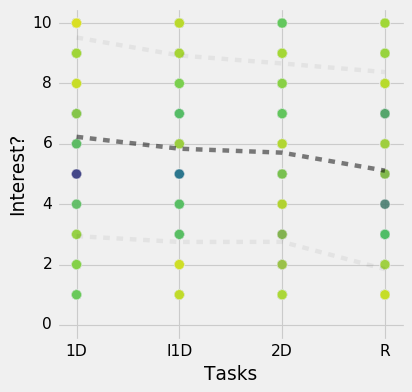

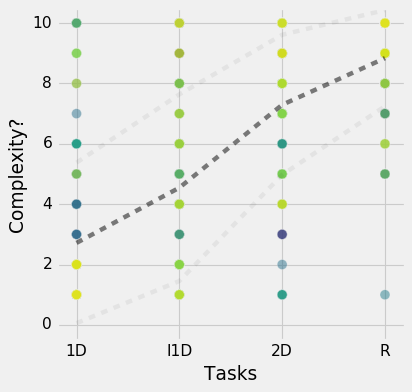

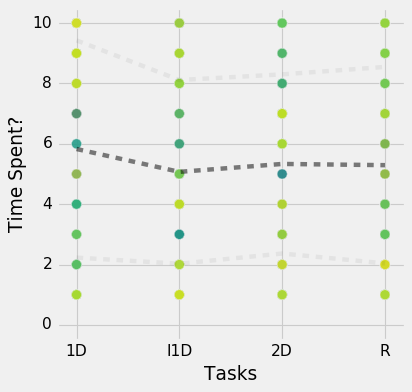

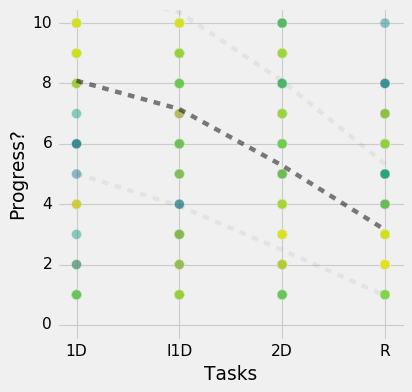

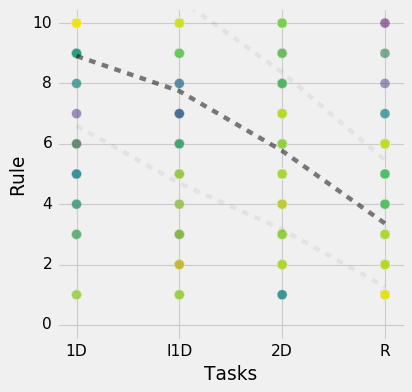

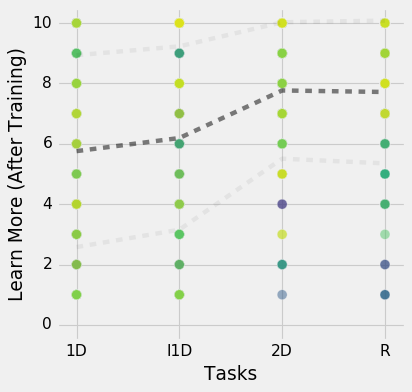

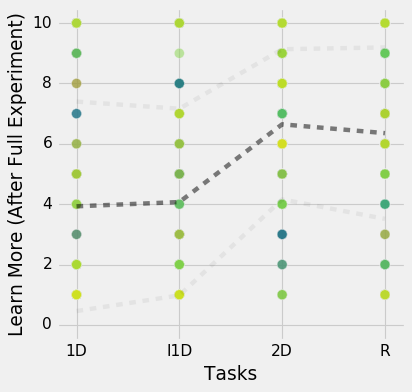

In [6]:
ytitlesFT = ['Interest?', 'Complexity?', 'Time Spent?', 'Progress?', 'Rule', 'Learn More (After Training)', 'Learn More (After Full Experiment)']
plotAgainstTask(informedFT, ytitlesFT, 6, 3)

## Free Exloration with Training: Uninformed

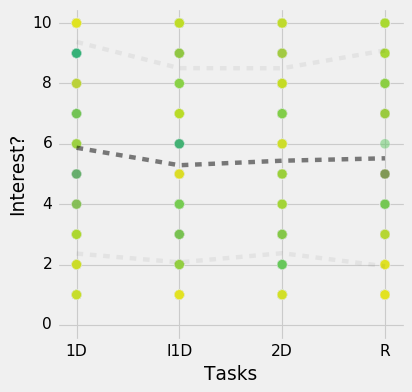

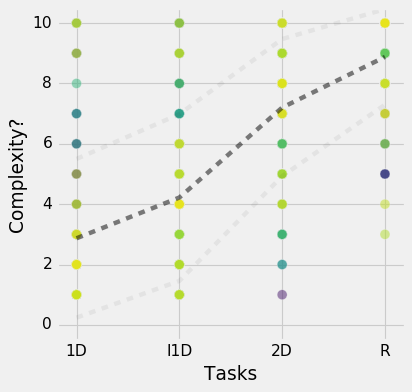

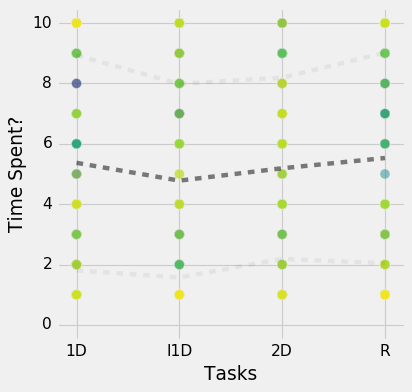

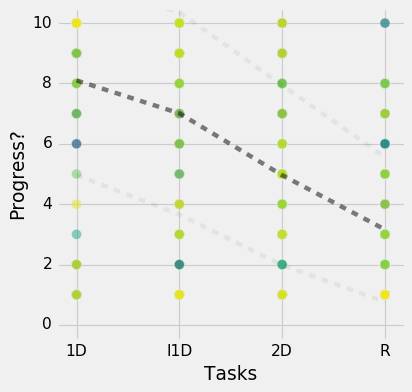

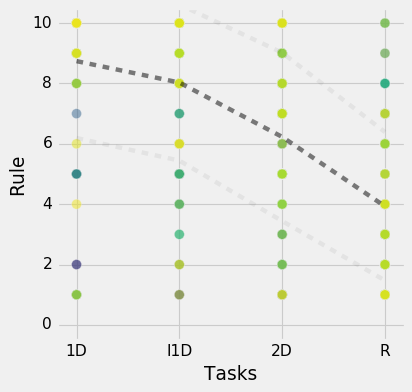

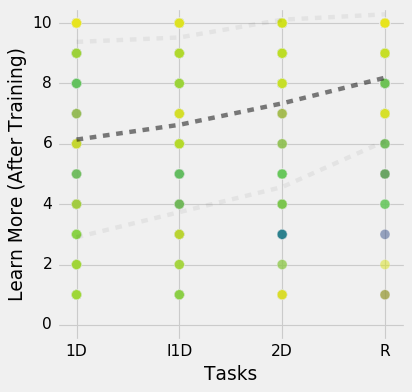

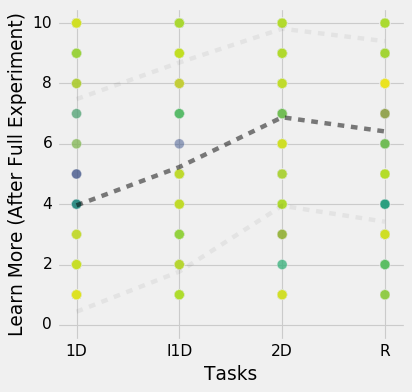

In [7]:
plotAgainstTask(uninformedFT, ytitlesFT, 6, 3)

## Free Exloration with Training: All subjects

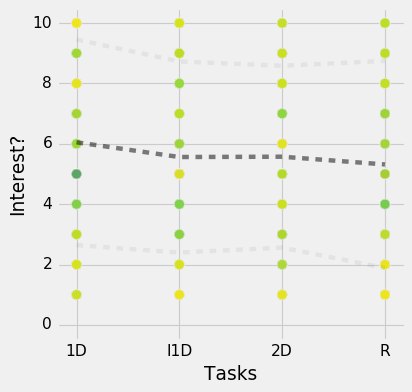

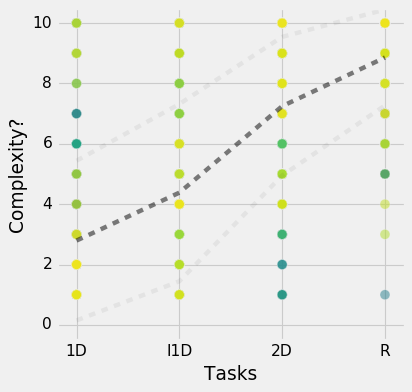

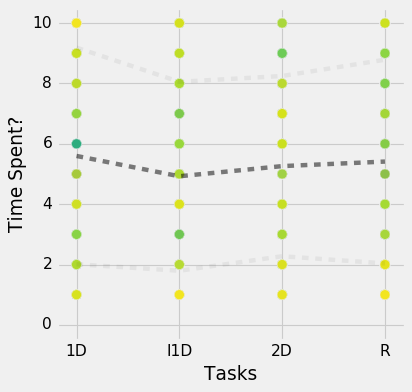

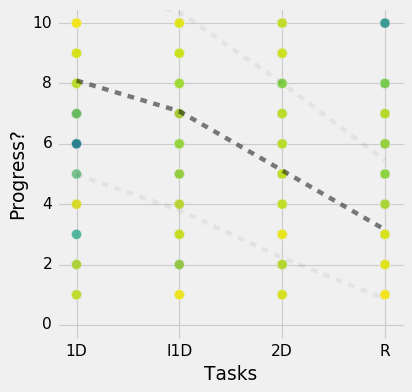

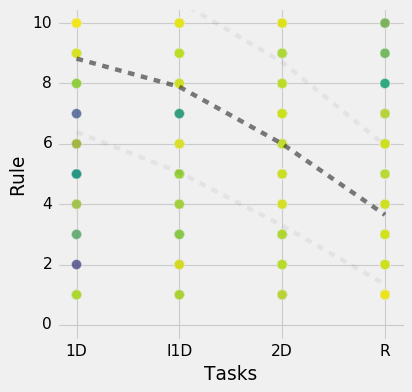

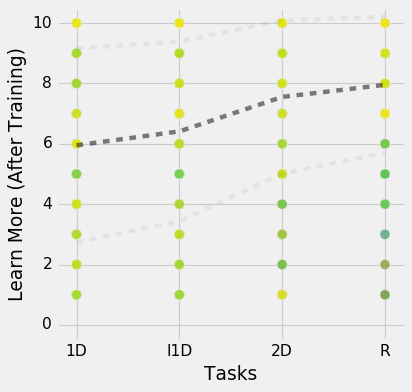

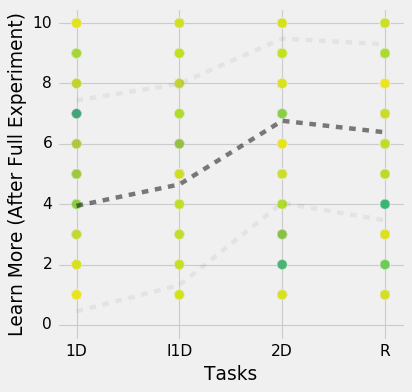

In [8]:

plotAgainstTask(spilot, ytitlesFT, 6, 3)

## Free Exploration Only

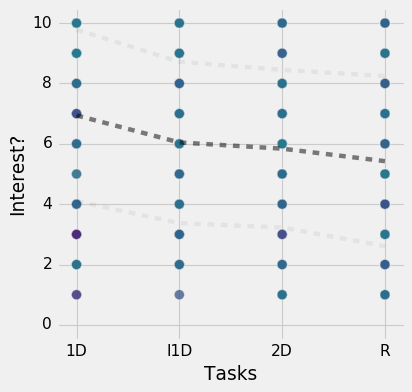

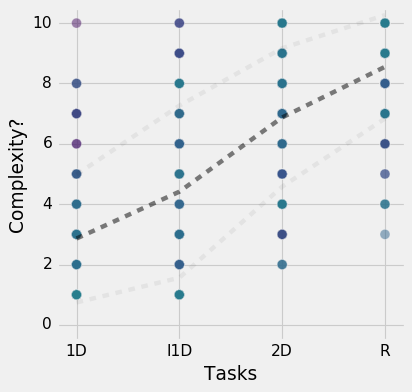

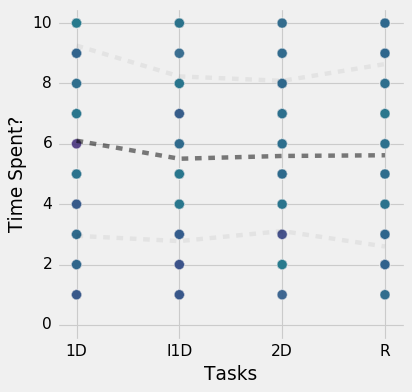

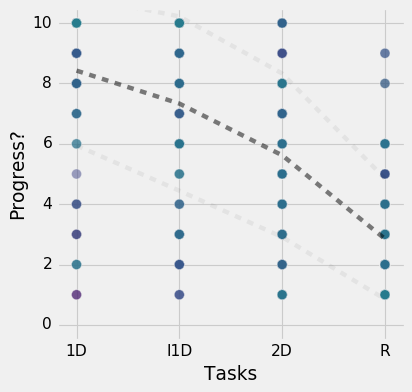

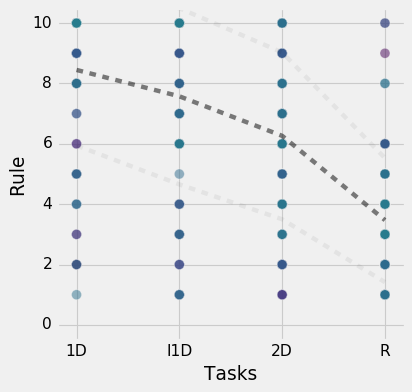

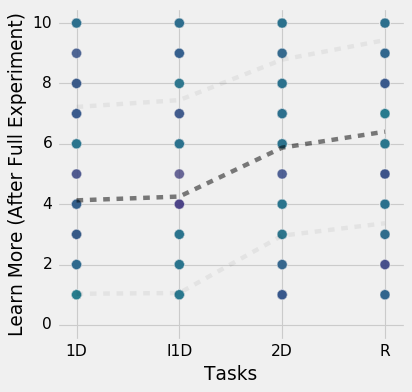

In [9]:
ytitlesF = ['Interest?', 'Complexity?', 'Time Spent?', 'Progress?', 'Rule', 'Learn More (After Full Experiment)']
plotAgainstTask(fpilot, ytitlesF, 6, 3)

In [10]:
fpilot[0,:]

array([  0.  ,   0.  ,  31.  ,   0.12,  18.  ,   0.58,  10.  ,   3.  ,
         6.  ,   8.  ,   8.  ,   7.  ])

In [6]:
# In the second pilot 
# id(0), cat-task complexity(1), # task selec(2), % sele(3), # correct on task(4), % correct(5)
# int(6), complex(7), time(8), prog(9), rule(10), learn(11), trCorrect(12), tr%Correct(13), 
# teCorrect(14), te%Correct(15)
def plotCombined(array1, array2, axisx, axisy, phasePilot2='exploration'):
    arr1 = array1.copy()
    arr2 = array2.copy()
    #axes = [uid, tkCplx, tkNSel, tkPSel, tkNCorr, tkPCorr, intst, cplx, tim, progr, rule, learn]
    dict = {'tkCplx': [1,'Task'], 
            'tkNSel': [2,'Times Selected'], 
            'tkPSel': [3,'Selected (Proportion)'],
            'tkNCorr': [4,'Times Correct'],
            'tkPCorr': [5,'Correct (Proportion)'],
            'interest': [6,'Interest'],
            'complex': [7,'Complexity'],
            'time': [8,'Time invested'],
            'progress': [9,'Progress'],
            'rule': [10,'Rule'],
            'learnAfterTrai': [11,'Type of Learning'],
            'learnAfterExp': [12,'Type of Learning']
           }
    # for fpilot learnAfterExp - 11 and learnAfterTrai doesn't exist
    
    xaxis, yaxis = dict[axisx][0], dict[axisy][0]
    
    # Depending on what is plotted swithc the column to where the free exploration data is for easy plotting
    if phasePilot2 == 'training':
        arr2[:,[4, 5]] = arr2[:,[13, 14]]
    
    fig, ax = plt.subplots(figsize=(5, 5))

    plt.scatter(arr1[:,xaxis], arr1[:,yaxis], c='r', s=80, alpha=0.5)
    plt.scatter(arr2[:,xaxis], arr2[:,yaxis], c='b', s=80, alpha=0.5)
    
    # Fit a polynomial
    if xaxis == 'learnAfterExp':
        m, b = np.polyfit(arr1[:,xaxis-1], arr1[:,yaxis], 1)
    elif yaxis == 'learnAfterExp':
        m, b = np.polyfit(arr1[:,xaxis], arr1[:,yaxis-1], 1)
    else:
        m, b = np.polyfit(arr1[:,xaxis], arr1[:,yaxis], 1)
    x = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],100)
    plt.plot(x, m*x + b, 'r-', label='Free Exp')
    m, b = np.polyfit(arr2[:,xaxis], arr2[:,yaxis], 1)
    x = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],100)
    plt.plot(x, m*x + b, 'b-', label=''.join(['Free Exp with Train']))
    
    plt.xlabel(dict[axisx][1])
    plt.ylabel(dict[axisy][1])
    
    plt.legend()
    plt.show()

In [12]:
print(np.shape(spilot), np.shape(fpilot))

((796L, 15L), (348L, 12L))


## Relation with respect to reported interest

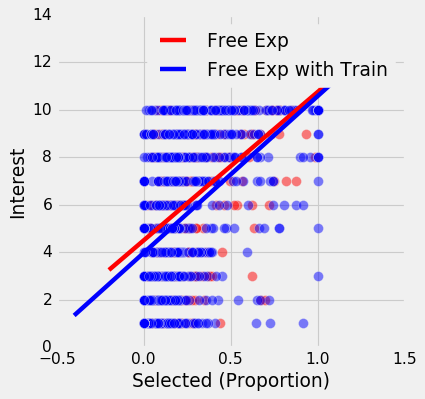

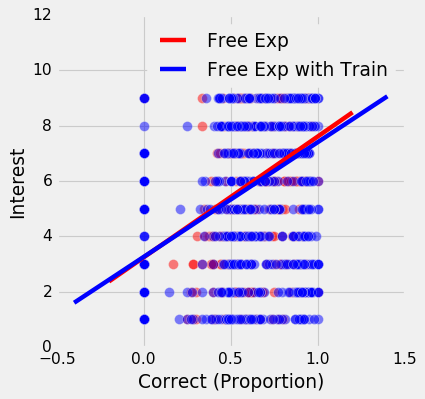

In [13]:
#%chosen and rep interest
plotCombined(fpilot,spilot,'tkPSel','interest','exploration')
plotCombined(fpilot,spilot,'tkPCorr','interest','exploration')
#plotCombined(fpilot,spilot,'tkPCorr','interest','training')
#print(fpilot[:,5],spilot[:,5])
#print(fpilot[0,:],spilot[0,:])

## Relation between accuracy and selection

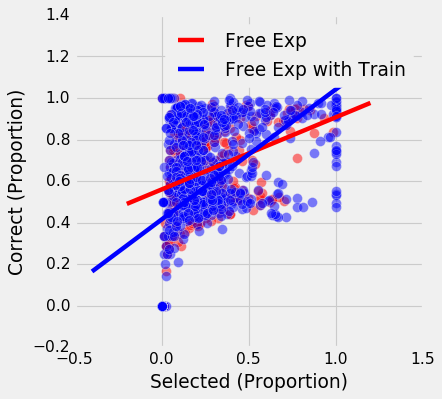

In [14]:
#axes = [uid, tkCplx, tkNSel, tkPSel, tkNCorr, tkPCorr, intst, cplx, tim, progr, rule, learn]
# %correct and %chosen
plotCombined(fpilot,spilot,'tkPSel','tkPCorr','exploration')

## Relation with respect to reported complexity

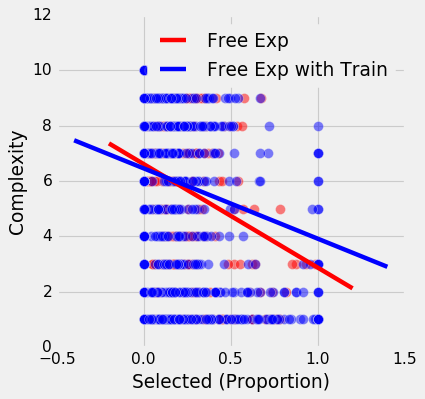

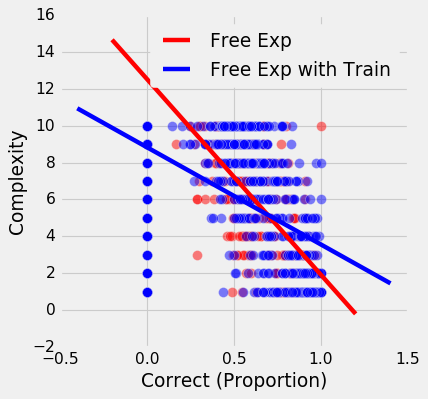

In [15]:
#axes = [uid, tkCplx, tkNSel, tkPSel, tkNCorr, tkPCorr, interest, complex, time, progress, rule, learn]
# %correct and %chosen
plotCombined(fpilot,spilot,'tkPSel','complex','exploration')
plotCombined(fpilot,spilot,'tkPCorr','complex','exploration')
#plotCombined(fpilot,spilot,'tkPCorr','complex','training')

## Relation with respect to reported progress

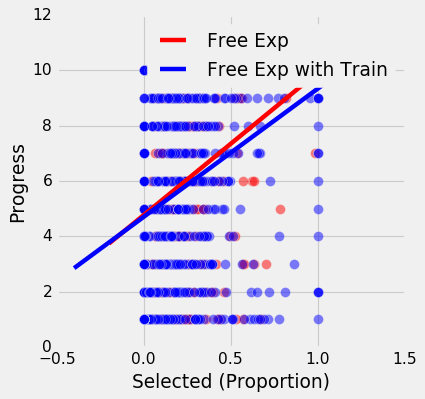

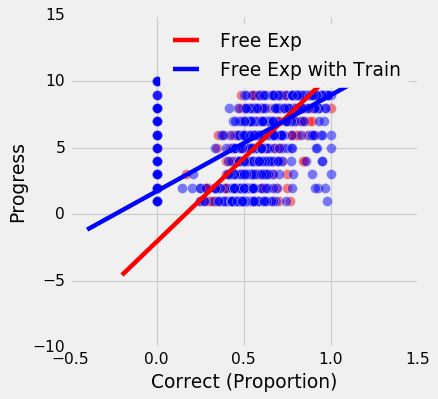

In [16]:
#axes = [uid, tkCplx, tkNSel, tkPSel, tkNCorr, tkPCorr, interest, complex, time, progress, rule, learn]
# %correct and %chosen
plotCombined(fpilot,spilot,'tkPSel','progress','exploration')
plotCombined(fpilot,spilot,'tkPCorr','progress','exploration')
#plotCombined(fpilot,spilot,'tkPCorr','progress','training')

## Relation with respect to reported time spent on task

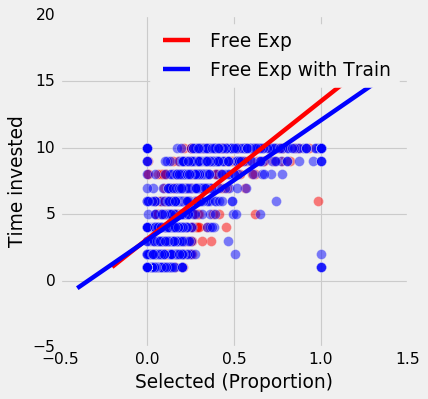

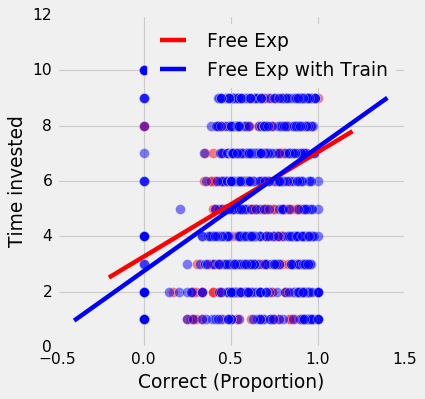

In [17]:
#axes = [uid, tkCplx, tkNSel, tkPSel, tkNCorr, tkPCorr, interest, complex, time, progress, rule, learn]
# %correct and %chosen
plotCombined(fpilot,spilot,'tkPSel','time','exploration')
plotCombined(fpilot,spilot,'tkPCorr','time','exploration')
#plotCombined(fpilot,spilot,'tkPCorr','time','training')

In [ ]:

# TAKE IDS (DISCOUNTING THOSE THAT I'M NOT TAKING INTO ACCOUNT FOR THE CORRELATIONS SUCH AS THOSE )
# you take what user selected first
# then from this files used here select the column of the learning

(array([3, 2, 1, 2, 0, 0, 1, 2, 1, 3, 0, 3, 3, 2, 1, 1, 0, 2, 2, 2, 1, 1, 2,
       0, 2, 1, 0, 2, 0, 3, 3, 0, 2, 2, 3, 0, 1, 1, 1, 3, 2, 1, 2, 1, 2, 2,
       0, 0, 0, 0, 0, 1, 2, 3, 1, 2, 1, 2, 0, 0, 2, 0, 3, 0, 0, 0, 3, 1, 0,
       0, 0, 3, 0, 0, 3, 1, 1, 1, 3, 0, 1, 3, 0, 0, 1, 1, 0, 2, 2, 3, 1, 1,
       2, 3, 1, 2, 0, 2, 3, 0, 1, 1, 2, 0, 2, 0, 0, 3, 0, 2, 0, 3, 3, 0, 2,
       0, 3, 0, 0, 0, 2, 0, 3, 2, 0, 2, 0, 1, 1, 0, 3, 2, 3, 0, 1, 0, 0, 2,
       0, 3, 1, 1, 2, 0, 1, 0, 2, 3, 0, 0, 0, 1, 2, 2, 3, 1, 0, 0, 0, 1, 3,
       3, 2, 0, 0, 1, 1, 3, 1, 0, 0, 0, 2, 1, 0, 2, 0, 3, 0, 0, 3, 2, 2, 2,
       3, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 0]), [array([ 6.]), array([ 10.]), array([ 8.]), array([ 10.]), array([ 4.]), array([ 9.]), array([ 1.]), array([ 10.]), array([ 6.]), array([ 1.]), array([ 1.]), array([ 10.]), array([ 9.]), array([ 4.]), array([ 7.]), array([ 10.]), array([ 9.]), array([ 8.]), array([ 10.]), array([ 9.]), array([ 6.]), array([ 10.]), array([ 8.]), array([

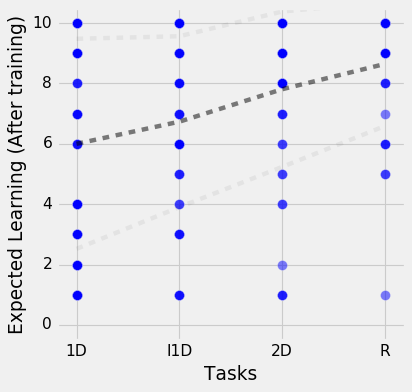

In [57]:
# How people are selecting after training

# plotCumSelec(splitInf, uInf, '(Informed)')
# plotCumSelec(splitUni, uUni, '(Uninformed)')
# plotCumSelec(splitCsv2E, users2, '(All subjects)')

def checkFirstOption(arr, usersArr, checkIncomplete=False):
    firstSelec = []
    incomplete = []
    for u in range(usersArr):
        # If it's necessary to check those that didn't explore all tasks
        if checkIncomplete:
            questions = arr[u]
            # Count number of times a task was selected
            task, ctask = np.unique(questions[:,1], return_counts=True)

            # Check if it explored all tasks
            if len(task) < 4:
                incomplete.append(u)
            else:
                firstSelec.append(arr[u][0,1])
        else:
            firstSelec.append(arr[u][0,1])
            
    if checkIncomplete:
        return np.asarray(firstSelec), incomplete
    else:
        return np.asarray(firstSelec)
        
def corrFirstSelection(arr, firstSel):
    grades = []
    for u in range(len(np.unique(arr[:,0]))): #get users
        temp = arr[arr[:,0] == u,:]
        # Slice by category that was first selected
        grade = temp[temp[:,1] == firstSel[u], 11] # 11 is the column for expected learning after training (in this case)
        #print(spilot[spilot[:,0] == u, spilot[:,1] == selFTA[u]])
        grades.append(grade)
    
    fig, ax = plt.subplots(figsize=(5, 5))

    # Control tick frequency
    plt.xticks(np.arange(min(arr[:,1]), max(arr[:,1])+1, 1.0))
    # Rename ticks
    ax.set_xticklabels(catLab)
    
    ax.set_ylim([-0.5,10.5])

    print(firstSel, grades, firstSel == 0, np.asarray(grades)[firstSel==0])
    plt.scatter(firstSel, grades, s=80, alpha=0.5)

    #Get means and std
    means = [np.mean(np.asarray(grades)[firstSel == k]) for k in range(TASKS)]
#     means = [np.mean(arr[arr[:,1] == k,offset+i]) for k in range(TASKS)]
    std = [np.std(np.asarray(grades)[firstSel == k]) for k in range(TASKS)]
    plt.plot(means, 'k--', alpha=0.5)
    plt.plot(np.asarray(means)+np.asarray(std), 'k--', alpha=0.05)
    plt.plot(np.asarray(means)-np.asarray(std), 'k--', alpha=0.05)

    #plt.plot(arr[:,1], arr[:,offset+i], '*')#, color=color[u], alpha=0.5)
    plt.ylabel('Expected Learning (After training)')
    plt.xlabel('Tasks')
    plt.show()

# Get first selections
selFTA = checkFirstOption(splitCsv2E, users2)#/2
selFTI = checkFirstOption(splitInf, uInf)
selFTU = checkFirstOption(splitUni, uUni)
selF, inc = checkFirstOption(splitCsv, users1, checkIncomplete=True)

corrFirstSelection(spilot, selFTA)

#evoSel = np.column_stack((selF,selFTA))#(selF,selFTA,selFTI,selFTU))
#plotEvolutionSel(evoSel, tas)

# print(inc, np.shape(inc))
# print(np.sum(selF==0), np.sum(selFTA==0))

# print(np.shape(selF), np.shape(selFTA), np.shape(splitCsv), np.shape(fpilot))

# print(selF, selFTA)




#task 1
#spilot[:,1]
#spilot[:,11]
